# 06 - Model Comparison

Goal:
- Combine evaluation metrics from ARIMA and Prophet models
- Compare across granularities (daily, weekly, monthly)
- Visualize RMSE/MAE results
- Identify the best model for forecasting


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Paths
METRICS_DIR = "../outputs/metrics"

# Load available metrics
metrics_files = [
    "arima_metrics.csv",            # ARIMA weekly
    "prophet_weekly_metrics.csv",   # Prophet weekly
    "prophet_daily_metrics.csv",    # Prophet daily
    "prophet_monthly_metrics.csv"   # Prophet monthly
]

dfs = []
for f in metrics_files:
    path = os.path.join(METRICS_DIR, f)
    if os.path.exists(path):
        df = pd.read_csv(path)
        df["SourceFile"] = f
        dfs.append(df)

all_metrics = pd.concat(dfs, ignore_index=True)
all_metrics


,Model,order,RMSE,MAE,SourceFile
0,ARIMA,"(1, 2, 3)",8766.937168,6814.866530,arima_metrics.csv
1,Prophet (weekly),NaN,6501.685911,5286.507160,prophet_weekly_metrics.csv
2,Prophet (daily),NaN,2904.041781,2095.196368,prophet_daily_metrics.csv
3,Prophet (monthly),NaN,16279.836113,12597.907619,prophet_monthly_metrics.csv


In [5]:
# Rename columns for clarity
if "order" in all_metrics.columns:
    all_metrics = all_metrics.drop(columns=["order"], errors="ignore")

all_metrics = all_metrics.rename(columns={"Model":"Model_Name"})

# Round metrics
all_metrics["RMSE"] = all_metrics["RMSE"].round(2)
all_metrics["MAE"] = all_metrics["MAE"].round(2)

display(all_metrics)

# Save combined table
all_metrics.to_csv(os.path.join(METRICS_DIR, "all_models_comparison.csv"), index=False)
print("Saved combined metrics to all_models_comparison.csv")


,Model_Name,RMSE,MAE,SourceFile
0,ARIMA,8766.94,6814.87,arima_metrics.csv
1,Prophet (weekly),6501.69,5286.51,prophet_weekly_metrics.csv
2,Prophet (daily),2904.04,2095.20,prophet_daily_metrics.csv
3,Prophet (monthly),16279.84,12597.91,prophet_monthly_metrics.csv


Saved combined metrics to all_models_comparison.csv


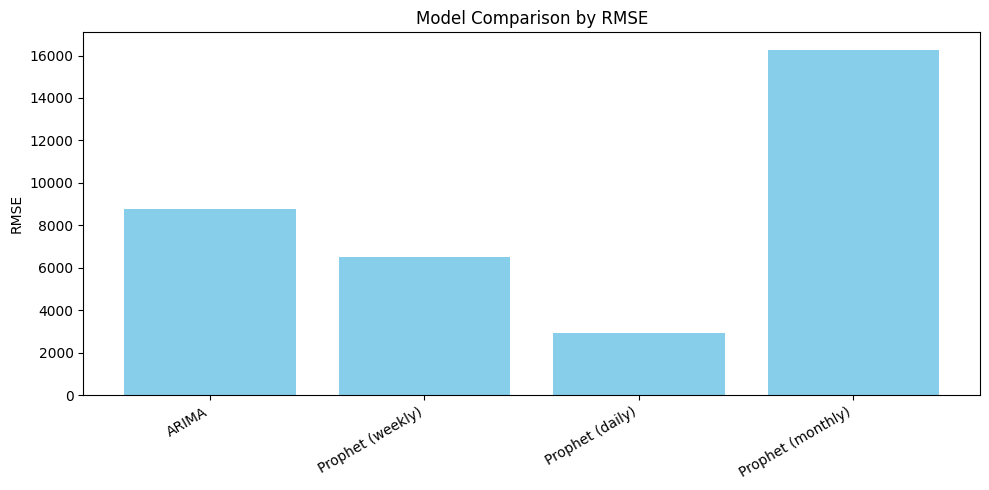

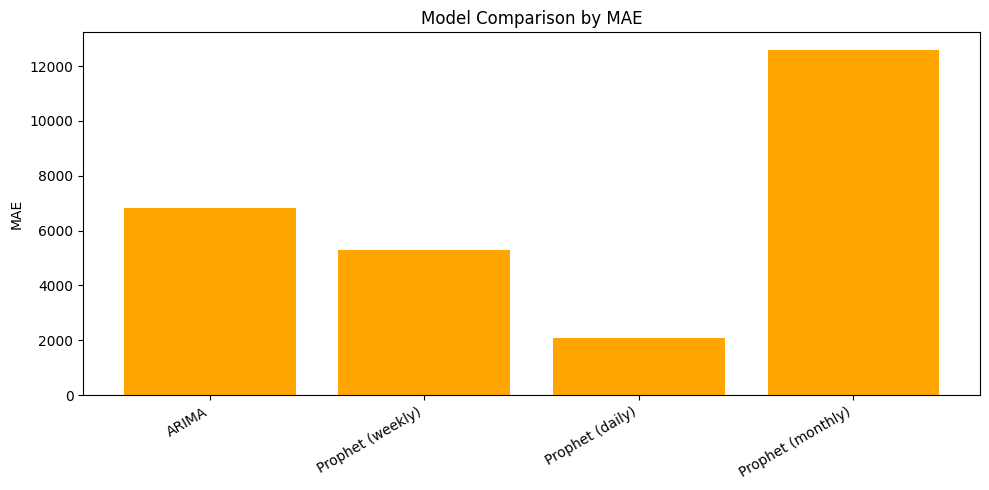

In [12]:
# RMSE plot
plt.figure(figsize=(10,5))
plt.bar(all_metrics["Model_Name"], all_metrics["RMSE"], color="skyblue")
plt.xticks(rotation=30, ha="right")
plt.ylabel("RMSE")
plt.title("Model Comparison by RMSE")
plt.tight_layout()
plt.savefig("../outputs/figures/model_comparison_rmse.png")   # ✅ save
plt.show()

# MAE plot
plt.figure(figsize=(10,5))
plt.bar(all_metrics["Model_Name"], all_metrics["MAE"], color="orange")
plt.xticks(rotation=30, ha="right")
plt.ylabel("MAE")
plt.title("Model Comparison by MAE")
plt.tight_layout()
plt.savefig("../outputs/figures/model_comparison_mae.png")   # ✅ save
plt.show()


In [9]:
best_rmse = all_metrics.loc[all_metrics["RMSE"].idxmin()]
best_mae = all_metrics.loc[all_metrics["MAE"].idxmin()]

print("Best model by RMSE:")
display(best_rmse)
print("Best model by MAE:")
display(best_mae)


Best model by RMSE:


Model_Name              Prophet (daily)
RMSE                            2904.04
MAE                              2095.2
SourceFile    prophet_daily_metrics.csv
Name: 2, dtype: object

Best model by MAE:


Model_Name              Prophet (daily)
RMSE                            2904.04
MAE                              2095.2
SourceFile    prophet_daily_metrics.csv
Name: 2, dtype: object

# Model Comparison Results

## Combined Results
- **ARIMA (weekly)** → RMSE ≈ 8767, MAE ≈ 6815  
- **Prophet (weekly)** → RMSE ≈ 6502, MAE ≈ 5287  
- **Prophet (daily)** → RMSE ≈ 2904, MAE ≈ 2095 ✅ Best model  
- **Prophet (monthly)** → RMSE ≈ 16280, MAE ≈ 12598  

## Best Model
- **By RMSE:** Prophet (daily) = 2904  
- **By MAE:** Prophet (daily) = 2095  

## Insights
- **Prophet (daily)** outperforms all other models by a large margin.  
  - Handles short-term cycles (weekday/weekend) + yearly holiday effects well.  
  - Best suited for **tactical forecasting** (day-to-day demand).  
- **Prophet (weekly)** is the next best choice.  
  - Smoother than daily, captures yearly seasonality.  
  - Ideal for **operational planning** (inventory, logistics).  
- **ARIMA (weekly)** is weaker than Prophet (weekly) → Prophet handles retail sales better.  
- **Prophet (monthly)** performs worst.  
  - Too coarse → loses important seasonality signals.  
  - Only useful for showing long-term growth trend.

## Recommendation
- Use **Prophet (daily)** as the baseline model for forecasting.  
- Use **Prophet (weekly)** for business planning when daily detail is unnecessary.  
- Avoid monthly for forecasting — use only for visualization.  
- Consider adding **holiday effects** (Diwali, Christmas, Black Friday, etc.) to Prophet to improve peak forecasts.
